In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('kr-vs-kp.data',header=0,sep=',')
data.head()

,f,f.1,f.2,f.3,f.4,f.5,f.6,f.7,f.8,f.9,...,f.23,f.24,f.25,f.26,f.27,f.28,t.2,t.3,n.1,won
0,f,f,f,f,t,f,f,f,f,f,...,f,f,f,f,f,f,t,t,n,won
1,f,f,f,f,t,f,t,f,f,f,...,f,f,f,f,f,f,t,t,n,won
2,f,f,f,f,f,f,f,f,t,f,...,f,f,f,f,f,f,t,t,n,won
3,f,f,f,f,f,f,f,f,f,f,...,f,f,f,f,f,f,t,t,n,won
4,f,f,f,f,f,f,f,f,f,f,...,f,f,t,f,f,f,t,t,n,won


In [2]:
data=pd.get_dummies(data,columns=['f', 'f.1', 'f.2', 'f.3', 'f.4', 'f.5', 'f.6', 'f.7', 'f.8', 'f.9', 'f.10', 'f.11', 'l', 'f.12', 'n', 'f.13', 'f.14', 't', 'f.15', 'f.16', 'f.17', 'f.18', 'f.19', 'f.20', 'f.21', 't.1', 'f.22', 'f.23', 'f.24', 'f.25', 'f.26', 'f.27', 'f.28', 't.2', 't.3', 'n.1'])
data.head()

,won,f_f,f_t,f.1_f,f.1_t,f.2_f,f.2_t,f.3_f,f.3_t,f.4_f,...,f.27_f,f.27_t,f.28_f,f.28_t,t.2_f,t.2_t,t.3_f,t.3_t,n.1_n,n.1_t
0,won,1,0,1,0,1,0,1,0,0,...,1,0,1,0,0,1,0,1,1,0
1,won,1,0,1,0,1,0,1,0,0,...,1,0,1,0,0,1,0,1,1,0
2,won,1,0,1,0,1,0,1,0,1,...,1,0,1,0,0,1,0,1,1,0
3,won,1,0,1,0,1,0,1,0,1,...,1,0,1,0,0,1,0,1,1,0
4,won,1,0,1,0,1,0,1,0,1,...,1,0,1,0,0,1,0,1,1,0


In [3]:
X=data.iloc[:,1:]
y=data.iloc[:,0]

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=7)

In [10]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear', C= 0.001, gamma=0.01) # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [11]:
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8425443169968717


In [12]:
from sklearn.model_selection import cross_val_score
import numpy as np
print(np.mean(cross_val_score(clf, X_train, y_train, cv=10)))

0.8072434247989181


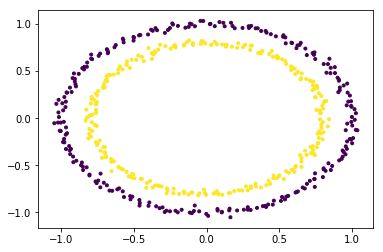

In [18]:
import matplotlib.pyplot as plt 
from sklearn.datasets import make_circles 
from mpl_toolkits.mplot3d import Axes3D 
X, Y = make_circles(n_samples = 500, noise = 0.02) 
plt.scatter(X[:, 0], X[:, 1], c = Y, marker = '.') 
plt.show() 

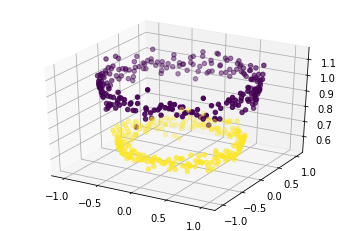

In [19]:
# adding a new dimension to X 
X1 = X[:, 0].reshape((-1, 1)) 
X2 = X[:, 1].reshape((-1, 1)) 
X3 = (X1**2 + X2**2) 
X = np.hstack((X, X3)) 
  
# visualizing data in higher dimension 
fig = plt.figure() 
axes = fig.add_subplot(111, projection = '3d') 
axes.scatter(X1, X2, X1**2 + X2**2, c = Y, depthshade = True) 
plt.show() 

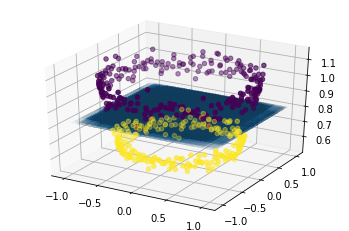

In [21]:
# create support vector classifier using a linear kernel 
from sklearn import svm 
  
svc = svm.SVC(kernel = 'linear') 
svc.fit(X, Y) 
w = svc.coef_ 
b = svc.intercept_ 
  
# plotting the separating hyperplane 
x1 = X[:, 0].reshape((-1, 1)) 
x2 = X[:, 1].reshape((-1, 1)) 
x1, x2 = np.meshgrid(x1, x2) 
x3 = -(w[0][0]*x1 + w[0][1]*x2 + b) / w[0][2] 
  
fig = plt.figure() 
axes2 = fig.add_subplot(111, projection = '3d') 
axes2.scatter(X1, X2, X1**2 + X2**2, c = Y, depthshade = True) 
axes1 = fig.gca(projection = '3d') 
axes1.plot_surface(x1, x2, x3, alpha = 0.01) 
plt.show() 
